# Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

#Importing the Dataset

In [20]:
data = pd.read_csv('/content/owid-covid-data.csv');
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Analyzing the rows and columns count of the dataset


In [3]:
data.shape


(4714, 59)

# Analyzing the data types of all the attributes present and their count

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               4714 non-null   object 
 1   continent                              3836 non-null   object 
 2   location                               4714 non-null   object 
 3   date                                   4713 non-null   object 
 4   total_cases                            4569 non-null   float64
 5   new_cases                              4570 non-null   float64
 6   new_cases_smoothed                     4513 non-null   float64
 7   total_deaths                           4382 non-null   float64
 8   new_deaths                             4406 non-null   float64
 9   new_deaths_smoothed                    4513 non-null   float64
 10  total_cases_per_million                4569 non-null   float64
 11  new_

# Descripting of the numerical attributes present in the dataset

In [4]:
data.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.569000e+03,4570.000000,4513.000000,4382.000000,4406.000000,4513.000000,4569.000000,4570.000000,4513.000000,4382.000000,4406.000000,4513.000000,3216.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1204.000000,1.338000e+03,1338.000000,1204.000000,1716.000000,1716.000000,1671.000000,1671.000000,4.290000e+02,3.650000e+02,2.600000e+02,3.530000e+02,7.580000e+02,429.000000,365.000000,260.000000,758.000000,2897.000000,4.713000e+03,3767.000000,3357.000000,3357.000000,3357.000000,3357.000000,2149.000000,3767.000000,3767.000000,2559.000000,2559.000000,1636.000000,2965.000000,3835.000000,3767.000000
mean,1.281351e+06,8618.544858,8476.427941,24796.411456,147.012937,141.455871,11170.315896,79.817413,79.939792,213.409741,1.284877,1.241316,1.033905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15422.341362,2.217537e+06,131.542062,0.727135,14368.416667,1.100891,0.153494,608.645542,2.947689e+07,1.346640e+07,5.390542e+06,1.139522e+06,4.983975e+05,2.976667,2.153644,0.443154,1662.584433,60.621108,5.822051e+08,78.010231,30.160083,8.784670,5.707986,16162.802986,0.886691,264.851018,7.639278,11.346815,35.592380,60.929278,3.193572,75.507220,0.763632
std,4.418116e+06,27626.603477,26309.881447,73600.375310,373.734537,358.983132,25490.978205,220.416054,174.401408,360.497512,3.769942,2.581441,0.296579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19298.118132,3.458520e+06,235.124273,0.687996,18746.618599,1.566088,0.123718,1660.012716,7.097162e+07,2.967182e+07,9.397518e+06,2.655600e+06,1.599937e+06,5.428211,5.291214,0.576022,3025.901519,23.613699,1.371433e+09,73.162344,7.589984,4.535558,3.096861,12545.532024,0.495661,140.696913,2.685760,9.575869,12.728795,28.750944,1.427709,7.085944,0.128393
min,1.000000e+00,-1.000000,-0.143000,1.000000,-3.000000,-0.143000,0.001000,-10.212000,-1.459000,0.001000,-0.091000,-0.006000,0.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.500200e+04,3.202000,16.800000,2.405000,1.337000,1803.987000,0.500000,107.791000,3.940000,0.700000,16.500000,26.664000,0.500000,61.150000,0.511000
25%,1.672000e+03,16.000000,19.000000,76.000000,0.000000,0.286000,286.730000,0.810750,1.820000,12.145500,0.000000,0.026000,0.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1033.750000,7.326225e+04,11.689250,0.176000,859.750000,0.290750,0.052500,4.400000,8.636900e+04,4.190700e+04,2.534615e+05,1.476600e+04,3.350000e+02,0.230000,0.070000,0.050000,118.250000,52.780000,2.877800e+06,17.348000,29.100000,6.211000,3.857000,8787.580000,0.500000,191.032000,5.500000,1.500000,27.700000,37.746000,1.900000,75.090000,0.748000
50%,2.726300e+04,135.000000,142.286000,905.000000,4.000000,4.000000,1145.927000,6.624500,7.794000,37.118000,0.152000,0.186000,1.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3952.000000,5.067110e+05,64.122000,0.557500,31

# Identifying the columns present

In [6]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

#Checking for count of all the unique values present for each attribute


In [7]:
data.nunique()

iso_code                                   12
continent                                   6
location                                   13
date                                      471
total_cases                              3819
new_cases                                1834
new_cases_smoothed                       2828
total_deaths                             2449
new_deaths                                717
new_deaths_smoothed                      1192
total_cases_per_million                  4007
new_cases_per_million                    2718
new_cases_smoothed_per_million           3413
total_deaths_per_million                 3094
new_deaths_per_million                    707
new_deaths_smoothed_per_million          1008
reproduction_rate                         190
icu_patients                                0
icu_patients_per_million                    0
hosp_patients                               0
hosp_patients_per_million                   0
weekly_icu_admissions             

# Checking for count of NULL values for each column 


In [8]:
data.isnull().sum()

iso_code                                    0
continent                                 878
location                                    0
date                                        1
total_cases                               145
new_cases                                 144
new_cases_smoothed                        201
total_deaths                              332
new_deaths                                308
new_deaths_smoothed                       201
total_cases_per_million                   145
new_cases_per_million                     144
new_cases_smoothed_per_million            201
total_deaths_per_million                  332
new_deaths_per_million                    308
new_deaths_smoothed_per_million           201
reproduction_rate                        1498
icu_patients                             4714
icu_patients_per_million                 4714
hosp_patients                            4714
hosp_patients_per_million                4714
weekly_icu_admissions             

# Continents in terms of occurence of covid cases on basis of iso_codes

In [9]:
data.continent.value_counts()[0:10]

Asia             828
Europe           826
Africa           808
South America    471
North America    467
Oceania          436
Name: continent, dtype: int64

# Analyzing cases worldwide

In [38]:
dataset = data[data['date']=='2021-04-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
416,AFG,Asia,Afghanistan,2021-04-15,57534.0,42.0,84.429,2533.0,1.0,2.429,1477.946,1.079,2.169,65.068,0.026,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
844,OWID_AFR,NaN,Africa,2021-04-15,4396924.0,12707.0,11238.857,117059.0,313.0,303.143,3279.823,9.479,8.383,87.318,0.233,0.226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,ALB,Europe,Albania,2021-04-15,129128.0,169.0,231.286,2335.0,4.0,5.429,44870.387,58.725,80.369,811.384,1.390,1.886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1676,DZA,Africa,Algeria,2021-04-15,119142.0,167.0,146.571,3144.0,3.0,3.571,2716.971,3.808,3.342,71.697,0.068,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2086,AND,Europe,Andorra,2021-04-15,12641.0,0.0,33.143,121.0,0.0,0.143,163605.772,0.000,428.950,1566.039,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2478,AGO,Africa,Angola,2021-04-15,23951.0,110.0,120.429,557.0,0.0,1.143,728.741,3.347,3.664,16.947,0.000,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2945,ATG,North America,Antigua and Barbuda,2021-04-15,1209.0,8.0,4.143,31.0,0.0,0.286,12345.805,81.693,42.305,316.559,0.000,2.918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.792800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
3416,ARG,South America,Argentina,2021-04-15,2629156.0,24999.0,22200.714,58925.0,383.0,257.571,58172.603,553.127,491.212,1303.772,8.474,5.699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3827,ARM,Asia,Armenia,2021-04-15,206142.0,1014.0,859.000,3817.0,23.0,20.286,69566.561,342.194,289.886,1288.120,7.762,6.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.96323

# download countries geojson file


In [39]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# generate choropleth map using the total deaths worldwide
world_map.choropleth(
    geo_data=world_geo,
    dataa=dataset,
    columns=['location', 'total_deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid 19 deaths worldwide'
)

# display map
world_map

GeoJSON file downloaded!


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#Top 10 countries in terms of total_deaths


In [40]:
top_10_deaths  =  dataset.sort_values("total_deaths",ascending = False)
top_10_deaths.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25267,OWID_EUR,NaN,Europe,2021-04-15,42628484.0,201003.0,182313.857,968845.0,3853.0,3647.143,56938.185,268.476,243.514,1294.071,5.146,4.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54309,OWID_NAM,NaN,North America,2021-04-15,36412856.0,94745.0,88741.857,829178.0,1443.0,1569.286,61500.702,160.023,149.884,1400.468,2.437,2.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,OWID_EUN,NaN,European Union,2021-04-15,28992762.0,162410.0,147228.143,655220.0,2802.0,2652.857,65164.127,365.033,330.910,1472.672,6.298,5.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68434,OWID_SAM,NaN,South America,2021-04-15,22990913.0,136479.0,129076.000,611375.0,4886.0,4094.429,53372.934,316.833,299.647,1419.295,11.343,9.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78071,USA,North America,United States,2021-04-15,31495649.0,74289.0,70483.571,565289.0,887.0,713.857,95152.257,224.436,212.940,1707.808,2.680,2.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
4277,OWID_ASI,NaN,Asia,2021-04-15,32605347.0,371608.0,321743.286,458325.0,2694.0,2345.571,7027.246,80.091,69.344,98.780,0.581,0.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10904,BRA,South America,Brazil,2021-04-15,13746681.0,73174.0,66689.143,365444.0,3560.0,2917.000,64672.183,344.252,313.744,1719.256,16.748,13.723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
48027,MEX,North America,Mexico,2021-04-15,2295435.0,4189.0,4059.429,211213.0,401.0,723.857,17803.351,32.490,31.485,1638.164,3.110,5.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
34083,IND,Asia,India,2021-04-15,14291917.0,217353.0,175910.714,174308.0,1185.0,952.286,10356.429,157.502,127.471,126.310,0.859,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Text(0.5, 1.0, 'Total deaths across the top 5 countries')

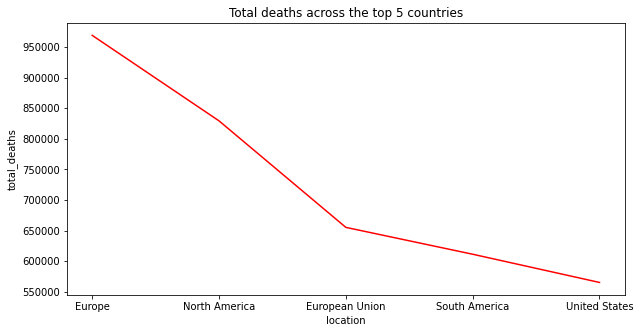

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_deaths[0:5],color='red')
plt.title("Total deaths across the top 5 countries")

#Top 10 countries in terms of new_cases

In [42]:
top_10_new_cases  =  dataset.sort_values("new_cases",ascending = False)
top_10_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4277,OWID_ASI,NaN,Asia,2021-04-15,32605347.0,371608.0,321743.286,458325.0,2694.0,2345.571,7027.246,80.091,69.344,98.780,0.581,0.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34083,IND,Asia,India,2021-04-15,14291917.0,217353.0,175910.714,174308.0,1185.0,952.286,10356.429,157.502,127.471,126.310,0.859,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
25267,OWID_EUR,NaN,Europe,2021-04-15,42628484.0,201003.0,182313.857,968845.0,3853.0,3647.143,56938.185,268.476,243.514,1294.071,5.146,4.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,OWID_EUN,NaN,European Union,2021-04-15,28992762.0,162410.0,147228.143,655220.0,2802.0,2652.857,65164.127,365.033,330.910,1472.672,6.298,5.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68434,OWID_SAM,NaN,South America,2021-04-15,22990913.0,136479.0,129076.000,611375.0,4886.0,4094.429,53372.934,316.833,299.647,1419.295,11.343,9.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54309,OWID_NAM,NaN,North America,2021-04-15,36412856.0,94745.0,88741.857,829178.0,1443.0,1569.286,61500.702,160.023,149.884,1400.468,2.437,2.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78071,USA,North America,United States,2021-04-15,31495649.0,74289.0,70483.571,565289.0,887.0,713.857,95152.257,224.436,212.940,1707.808,2.680,2.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
10904,BRA,South America,Brazil,2021-04-15,13746681.0,73174.0,66689.143,365444.0,3560.0,2917.000,64672.183,344.252,313.744,1719.256,16.748,13.723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
75866,TUR,Asia,Turkey,2021-04-15,4086957.0,61400.0,56727.286,35031.0,297.0,261.429,48458.646,728.014,672.610,415.359,3.521,3.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#Top 10 countries with least cases 


In [43]:
top_10_least_total_cases  =  dataset.sort_values("total_cases",ascending = True)
top_10_least_total_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48112,FSM,Oceania,Micronesia (country),2021-04-15,1.0,0.0,0.000,NaN,NaN,0.0,8.694,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115021.0,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620
62899,WSM,Oceania,Samoa,2021-04-15,3.0,0.0,0.000,NaN,NaN,0.0,15.120,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198410.0,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
79024,VUT,Oceania,Vanuatu,2021-04-15,3.0,0.0,0.000,NaN,NaN,0.0,9.767,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307150.0,22.662,23.1,4.394,2.620,2921.909,13.2,546.300,12.02,2.8,34.5,25.209,NaN,70.47,0.609
46764,MHL,Oceania,Marshall Islands,2021-04-15,4.0,0.0,0.000,NaN,NaN,0.0,67.574,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59194.0,295.150,NaN,NaN,NaN,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.7,73.70,0.704
67185,SLB,Oceania,Solomon Islands,2021-04-15,19.0,0.0,0.000,NaN,NaN,0.0,27.661,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,686878.0,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.4,73.00,0.567
79430,VAT,Europe,Vatican,2021-04-15,27.0,0.0,0.000,NaN,NaN,0.0,33374.536,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
61954,KNA,North America,Saint Kitts and Nevis,2021-04-15,44.0,0.0,0.000,NaN,NaN,0.0,827.192,0.0,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53192.0,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.3,76.23,0.779
40864,LAO,Asia,Laos,2021-04-15,53.0,0.0,0.571,NaN,NaN,0.0,7.285,0.0,0.079,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7275556.0,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.5,67.92,0.613
26294,FJI,Oceania,Fiji,2021-04-15,68.0,0.0,0.143,2.0,0.0,0.0,75.855,0.0,0.159,2.231,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896444.0,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.3,67.44,0.743
30217,GRD,North America,Grenada,2021-04-15,155.0,0.0,0.000,1.0,0.0,0.0,1377.545,0.0,0.000,8.887,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#Top 10 countries with least new cases 

In [44]:
top_10_least_new_cases  =  dataset.sort_values("new_cases",ascending = True)
top_10_least_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
42038,LSO,Africa,Lesotho,2021-04-15,10709.0,0.0,0.286,315.0,0.0,0.000,4998.945,0.0,0.133,147.042,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2142252.0,73.562,22.2,4.506,2.647,2851.153,59.6,405.126,3.94,0.4,53.9,2.117,NaN,54.33,0.527
13345,CMR,Africa,Cameroon,2021-04-15,61731.0,0.0,0.000,919.0,0.0,0.000,2325.447,0.0,0.000,34.619,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26545864.0,50.885,18.8,3.165,1.919,3364.926,23.8,244.661,7.20,NaN,NaN,2.735,1.30,59.29,0.563
62352,LCA,North America,Saint Lucia,2021-04-15,4355.0,0.0,6.143,64.0,0.0,0.143,23716.298,0.0,33.453,348.529,0.0,0.778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183629.0,293.187,34.9,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.30,76.20,0.759
27583,GAB,Africa,Gabon,2021-04-15,21566.0,0.0,185.857,132.0,0.0,1.143,9689.414,0.0,83.504,59.306,0.0,0.513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2225728.0,7.859,23.1,4.450,2.976,16562.413,3.4,259.967,7.20,NaN,NaN,NaN,6.30,66.47,0.703
14689,CAF,Africa,Central African Republic,2021-04-15,5682.0,0.0,40.000,75.0,0.0,0.143,1176.455,0.0,8.282,15.529,0.0,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829764.0,7.479,18.3,3.655,2.251,661.240,NaN,435.727,6.10,NaN,NaN,16.603,1.00,53.28,0.397
58585,PER,South America,Peru,2021-04-15,1667737.0,0.0,7124.714,55812.0,0.0,262.000,50580.638,0.0,216.085,1692.717,0.0,7.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32971846.0,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777
17104,COG,Africa,Congo,2021-04-15,10084.0,0.0,0.000,139.0,0.0,0.286,1827.443,0.0,0.000,25.190,0.0,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5518092.0,15.405,19.0,3.402,2.063,4881.406,37.0,344.094,7.20,1.7,52.3,47.964,NaN,64.57,0.574
53054,NIC,North America,Nicaragua,2021-04-15,6778.0,0.0,7.286,180.0,0.0,0.143,1023.163,0.0,1.100,27.172,0.0,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6624554.0,51.667,27.3,5.445,3.519,5321.444,3.2,137.016,11.47,NaN,NaN,NaN,0.90,74.48,0.660
52661,NZL,Oceania,New Zealand,2021-04-15,2591.0,0.0,4.286,26.0,0.0,0.000,537.303,0.0,0.889,5.392,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822233.0,18.206,37.9,15.322,9.720,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,

In [ ]:
#Visualizing top 10 countries with maximum  new cases 


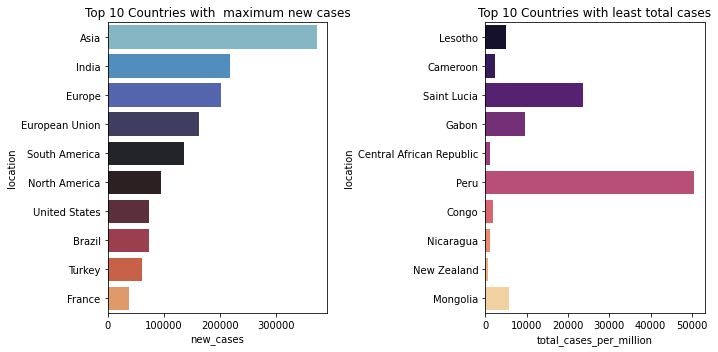

In [58]:
fig,axes = plt.subplots(figsize=(10,5),nrows =1, ncols = 2)
sns.barplot(x =top_10_new_cases["new_cases"][:10], y =top_10_new_cases["location"][:10],
           ax = axes[0], palette ="icefire", orient = "h");
axes[0].set_title("Top 10 Countries with  maximum new cases")

#Visualizing top 10 countries with  least total cases 
sns.barplot(x = top_10_least_new_cases["total_cases_per_million"][:10], y = top_10_least_new_cases["location"][:10],
           ax =axes[1], palette = "magma", orient = "h")
axes[1].set_title("Top 10 Countries with least total cases")
fig.tight_layout()


#Analysis of Covid Cases across Asia


# Collating the Asia Data from the given dataset

In [47]:
asia_data = data[data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='2021-04-15']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
416,AFG,Asia,Afghanistan,2021-04-15,57534.0,42.0,84.429,2533.0,1.0,2.429,1477.946,1.079,2.169,65.068,0.026,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3827,ARM,Asia,Armenia,2021-04-15,206142.0,1014.0,859.000,3817.0,23.0,20.286,69566.561,342.194,289.886,1288.120,7.762,6.846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.776
5550,AZE,Asia,Azerbaijan,2021-04-15,294211.0,2317.0,2147.143,4045.0,36.0,33.429,29017.252,228.520,211.767,398.948,3.551,3.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.756
6363,BHR,Asia,Bahrain,2021-04-15,160934.0,970.0,1122.857,574.0,5.0,3.714,94578.989,570.057,659.890,337.333,2.938,2.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.852
6772,BGD,Asia,Bangladesh,2021-04-15,707362.0,4192.0,5890.000,10081.0,94.0,80.000,4295.128,25.454,35.764,61.212,0.571,0.486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


In [48]:
asia_data.tail()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
75866,TUR,Asia,Turkey,2021-04-15,4086957.0,61400.0,56727.286,35031.0,297.0,261.429,48458.646,728.014,672.610,415.359,3.521,3.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84339067.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
77180,ARE,Asia,United Arab Emirates,2021-04-15,491423.0,1928.0,1898.857,1545.0,4.0,3.143,49686.868,194.937,191.990,156.212,0.404,0.318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9890400.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.840,17.26,1.2,37.4,NaN,1.20,77.97,0.890
78867,UZB,Asia,Uzbekistan,2021-04-15,85730.0,227.0,201.143,634.0,0.0,0.000,2561.460,6.782,6.010,18.943,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33469199.0,76.134,28.2,4.469,2.873,6253.104,NaN,724.417,7.57,1.3,24.7,NaN,4.00,71.72,0.720
80277,VNM,Asia,Vietnam,2021-04-15,2758.0,25.0,12.857,35.0,0.0,0.000,28.334,0.257,0.132,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
81098,YEM,Asia,Yemen,2021-04-15,5657.0,75.0,74.857,1097.0,14.0,13.286,189.667,2.515,2.510,36.780,0.469,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470


In [49]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34083,IND,Asia,India,2021-04-15,14291917.0,217353.0,175910.714,174308.0,1185.0,952.286,10356.429,157.502,127.471,126.310,0.859,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
35349,IRN,Asia,Iran,2021-04-15,2168872.0,25078.0,23134.000,65680.0,321.0,256.571,25822.071,298.573,275.428,781.970,3.822,3.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.399295e+07,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
34493,IDN,Asia,Indonesia,2021-04-15,1589359.0,6177.0,5211.286,43073.0,167.0,120.857,5810.683,22.583,19.052,157.475,0.611,0.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.735236e+08,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
75866,TUR,Asia,Turkey,2021-04-15,4086957.0,61400.0,56727.286,35031.0,297.0,261.429,48458.646,728.014,672.610,415.359,3.521,3.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
56513,PAK,Asia,Pakistan,2021-04-15,745182.0,5364.0,4907.571,15982.0,110.0,107.571,3373.508,24.283,22.217,72.352,0.498,0.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.208923e+08,255.573,23.5,4.495,2.780,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.60,67.27,0.557


Text(0.5, 1.0, 'Total deaths across asian countries')

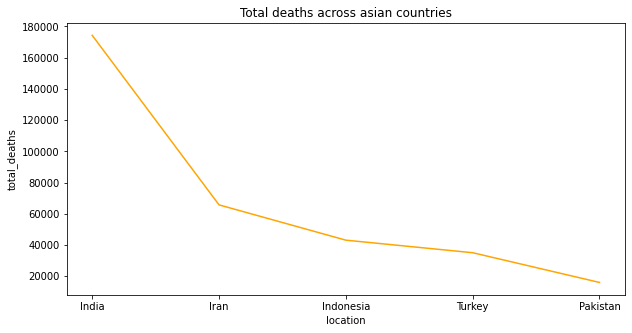

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

# Top 10 Asian countries with least number of  total_cases being reported

In [51]:
top_10_least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
top_10_least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
40864,LAO,Asia,Laos,2021-04-15,53.0,0.0,0.571,NaN,NaN,0.000,7.285,0.000,0.079,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.275556e+06,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92,0.613
80277,VNM,Asia,Vietnam,2021-04-15,2758.0,25.0,12.857,35.0,0.0,0.000,28.334,0.257,0.132,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
72646,TWN,Asia,Taiwan,2021-04-15,1068.0,1.0,2.571,11.0,0.0,0.143,44.842,0.042,0.108,0.462,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.381678e+07,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN
15950,CHN,Asia,China,2021-04-15,102135.0,17.0,21.571,4845.0,0.0,0.571,70.960,0.012,0.015,3.366,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
81098,YEM,Asia,Yemen,2021-04-15,5657.0,75.0,74.857,1097.0,14.0,13.286,189.667,2.515,2.510,36.780,0.469,0.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470


# Least number of toal_cases reported across Asian Countries

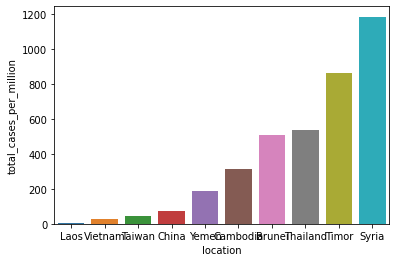

In [52]:
sns.barplot(x="location", y="total_cases_per_million", data=top_10_least_asia_cases.head(10))

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

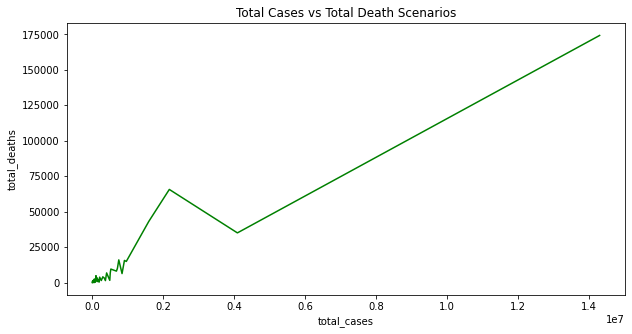

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="green")
plt.title("Total Cases vs Total Death Scenarios")

#COMMEMNTS
1)Asia is the most affected continest worlwide.

2)India is the most affected country in Asia with maximum number of new cases as per the yesterday's records

3)Lesotho in Africa has reported 0 cases with few other countries yesterday as per the world records

4)Laos is the country with least number of total Covid-19 cases in Asia. 

5)Micronesia has reported least number of total cases.

6)Europe has the highest number of total deaths due to Covid-19